### **RANDOM IMPUTATION**


Randomly select the data from the number for the imputation. 

For a distribution with the certain distribution, probality of slection of ceratin data will be high and certain will be low. So when radnomly slecting, data will be selected according to the porbablity thus there will be no change in distribution. \
<u> **Some of the advantages of the random imputation are:**</u>
1. Preserves varience of the data
2. Memory heavy for deployment as we need to store the original training set to extract values from and replace the NA in coming observations.
3. Well suited for linear model as it doesnot distrub the distribution. 


It does not work better in the decision tree like alogotihtm but work better in the linear models.\
It distrubs the covarience of the data.

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
data=sns.load_dataset('titanic')

In [27]:
data=data[['age','fare','survived']]

In [28]:
data.head(
    
)

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   fare      891 non-null    float64
 2   survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [30]:
data.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [31]:
#to find the  
data.isnull().mean()*100

age         19.86532
fare         0.00000
survived     0.00000
dtype: float64

In [32]:
data['age_imputed']=data['age']

In [33]:
# Replace missing values in 'age_imputed' with random samples from non-missing 'age' values
data.loc[data['age'].isnull(), 'age_imputed'] = data['age'].dropna().sample(data['age'].isnull().sum(), random_state=42).values


In [34]:
data.isnull().sum()

age            177
fare             0
survived         0
age_imputed      0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          714 non-null    float64
 1   fare         891 non-null    float64
 2   survived     891 non-null    int64  
 3   age_imputed  891 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.0 KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_17568\3249185958.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


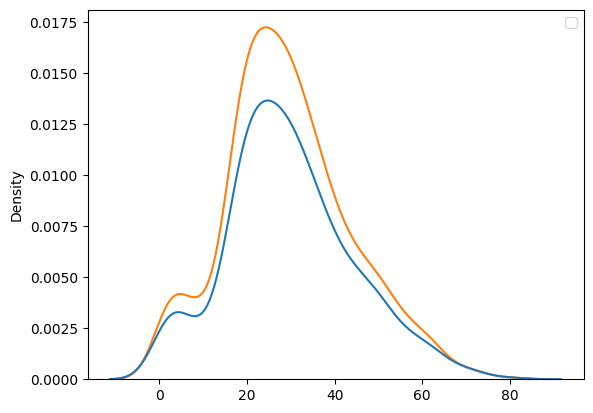

In [36]:
plt.figure()
sns.kdeplot(data=data[['age','age_imputed']])
#sns.displot(data=data,x='age_imputed',label='after imputation')
plt.legend()

In [37]:
#comparison of varience before and after
print("Original:",data['age'].var()) 
print('After_imputation:',data['age_imputed'].var()) 



Original: 211.01912474630802
After_imputation: 204.35522894437509


Here we can see there is not much difference in the varience before and after the imputation.

<Axes: >

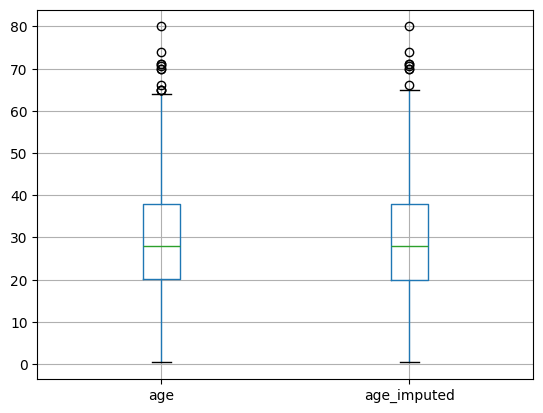

In [38]:
data[['age','age_imputed']].boxplot()

In [39]:
url='https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv'
housing_data=pd.read_csv(url)

In [40]:
housing_data=housing_data[['GarageQual','FireplaceQu','SalePrice']]
housing_data.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [41]:
print(housing_data.isnull().sum())

GarageQual      81
FireplaceQu    690
SalePrice        0
dtype: int64


In [42]:
housing_data['FireplaceQu_imputed'] = housing_data['FireplaceQu']
housing_data['GarageQual_imputed'] = housing_data['GarageQual']

housing_data.loc[housing_data['GarageQual'].isnull(), 'GarageQual_imputed'] = (
    housing_data['GarageQual'].dropna().sample(
        housing_data['GarageQual'].isnull().sum(),
        replace=True,  # This line is critical
        random_state=42
    ).values
)

housing_data.loc[housing_data['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = (
    housing_data['FireplaceQu'].dropna().sample(
        housing_data['FireplaceQu'].isnull().sum(),
        replace=True,  # This line is critical
        random_state=42
    ).values
)


In [43]:
housing_data.head(2)

,GarageQual,FireplaceQu,SalePrice,FireplaceQu_imputed,GarageQual_imputed
0,TA,NaN,208500,Gd,TA
1,TA,TA,181500,TA,TA


In [44]:
housing_data.isnull().sum()

GarageQual              81
FireplaceQu            690
SalePrice                0
FireplaceQu_imputed      0
GarageQual_imputed       0
dtype: int64

In [ ]:
temp=pd.concat(
    [
        housing_data['GarageQual'].value_counts()/len(housing_data['GarageQual'].dropna()),
        housing_data['GarageQual_imputed'].value_counts()/len(housing_data)
    ],
    axis=1
    
)
temp.columns=['original','imputed']

In [46]:
temp

,original,imputed
TA,0.950689,0.952055
Fa,0.034808,0.034247
Gd,0.010152,0.009589
Ex,0.002175,0.002055
Po,0.002175,0.002055


In [47]:
temp=pd.concat(
    [
        housing_data['FireplaceQu'].value_counts()/len(housing_data['FireplaceQu'].dropna()),
        housing_data['FireplaceQu_imputed'].value_counts()/len(housing_data)
    ],
    axis=1
    
)
temp.columns=['original','imputed']

In [48]:
temp

,original,imputed
Gd,0.493506,0.480822
TA,0.406494,0.421918
Fa,0.042857,0.039041
Ex,0.031169,0.035616
Po,0.025974,0.022603


The dataframes were constructed to show the change in the distrubution of the categories before and after the iumputation. With the random impuatation we can see that the distribution are also same in case of both of the columns.

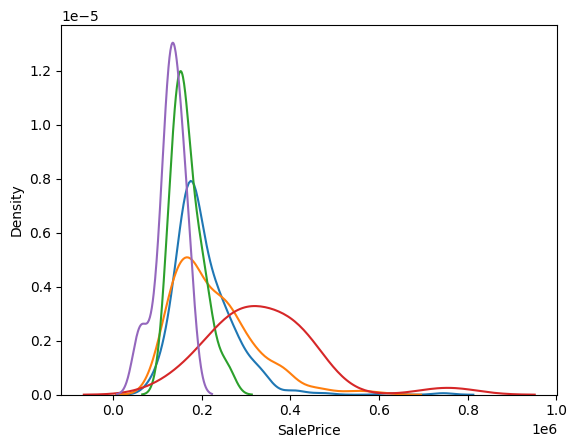

In [51]:
for category in housing_data['FireplaceQu'].dropna().unique():
    sns.kdeplot(housing_data[housing_data['FireplaceQu']==category]['SalePrice'])



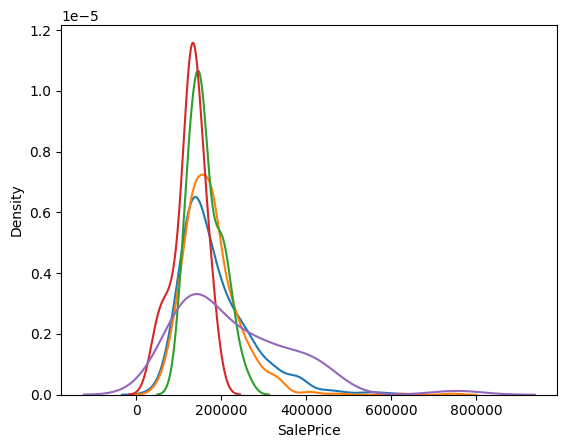

In [52]:
for category in housing_data['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(housing_data[housing_data['FireplaceQu_imputed']==category]['SalePrice'])



Here the distribution of the sale price changes after the imputation thus we would not use the random imputation for FireplaceQu for the linearmodel.